# Exploring Dandiset 001361: A Flexible Hippocampal Population Code for Experience Relative to Reward

> **Note**: This notebook was generated with the assistance of artificial intelligence. Please exercise caution when interpreting the code or results and verify key findings independently.

## Introduction

This notebook explores DANDI:001361, which contains two-photon calcium imaging and behavioral data from hippocampal area CA1 in mice as they navigate virtual environments with changing hidden reward locations. The data supports the study by Sosa, Plitt, & Giocomo, "A flexible hippocampal population code for experience relative to reward" (Nature Neuroscience, 2025).

**Dandiset link**: [DANDI:001361 – A flexible hippocampal population code for experience relative to reward](https://dandiarchive.org/dandiset/001361/0.250406.0045)

**DOI**: [10.48324/dandi.001361/0.250406.0045](https://doi.org/10.48324/dandi.001361/0.250406.0045)

**Related code**: [GitHub Repository](https://github.com/GiocomoLab/Sosa_et_al_2024)

## What This Notebook Covers

1. Overview of the Dandiset's structure, subjects, and experimental design
2. Accessing NWB files and examining basic metadata
3. Exploring behavioral data (position, speed, licks, rewards)
4. Examining calcium imaging data (ROIs, fluorescence traces)
5. Visualizing key data components and interactions

This notebook aims to provide researchers with a foundation to begin their own analyses of this dataset, focusing on practical data access and visualization methods.

## Required Packages

The following packages are needed to run this notebook:

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dandi.dandiapi import DandiAPIClient
from itertools import islice

# Display settings for better visualization
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

## Exploring the Dandiset Metadata

In [2]:
# Connect to DANDI and get the dandiset metadata
client = DandiAPIClient()
dandiset = client.get_dandiset('001361', '0.250406.0045')
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045
Description: 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. Included in Sosa, Plitt, & Giocomo, "A flexible hippocampal population code for experience relative to reward," Nature Neuroscience.

To reinforce rewarding behaviors, events leading up to and following rewards must be remembered. Hippocampal place cell activity spans spatial and non-spatial episodes, but whether hippocampal activity encodes entire sequences of events relative to reward is unknown. To test this, we performed two-photon imaging of hippocampal CA1 as mice navigated virtual environments with changing hidden reward locations. When the reward moved, a subpopulation of neurons updated their firing fields to the same relative position with respect to reward, constructing behavioral timescale sequences spa

## Enumerating Available NWB Files

In [3]:
# Get list of .nwb files in the dandiset
assets = list(dandiset.get_assets_by_glob('*.nwb'))

# Create a summary dataframe
files_info = [
    {'path': a.path, 'size_MB': round(a.size / 1e6, 2)}
    for a in assets
]

files_table = pd.DataFrame(files_info)

# Summary statistics
num_files = len(files_table)
total_size_GB = round(files_table['size_MB'].sum() / 1000, 2)

print(f"Total number of NWB files: {num_files}")
print(f"Combined size: ~{total_size_GB} GB")
print("\nExample of file structure (first 10 files):")
files_table.head(10)

Total number of NWB files: 152
Combined size: ~92.56 GB

Example of file structure (first 10 files):


,path,size_MB
0,sub-m11/sub-m11_ses-05_behavior+ophys.nwb,99.31
1,sub-m11/sub-m11_ses-04_behavior+ophys.nwb,89.67
2,sub-m11/sub-m11_ses-07_behavior+ophys.nwb,119.72
3,sub-m11/sub-m11_ses-06_behavior+ophys.nwb,94.61
4,sub-m11/sub-m11_ses-08_behavior+ophys.nwb,128.45
5,sub-m11/sub-m11_ses-10_behavior+ophys.nwb,110.88
6,sub-m11/sub-m11_ses-03_behavior+ophys.nwb,93.43
7,sub-m11/sub-m11_ses-09_behavior+ophys.nwb,110.02
8,sub-m11/sub-m11_ses-11_behavior+ophys.nwb,111.62
9,sub-m11/sub-m11_ses-12_behavior+ophys.nwb,120.94


The Dandiset contains 152 NWB files totaling ~92.6 GB. Each file follows a naming convention of:

`sub-<subject_id>/sub-<subject_id>_ses-<session_number>_behavior+ophys.nwb`

This structure indicates:
- Files are organized by subject (mouse)
- Each subject has multiple recording sessions
- Each file contains both behavioral and two-photon imaging data ("behavior+ophys")

## Examining an NWB File's Structure and Metadata

Let's open one example NWB file to explore its structure and content. We'll use remote streaming to avoid downloading the entire file.

In [4]:
# Choose an example file
asset_path = "sub-m11/sub-m11_ses-05_behavior+ophys.nwb"

# Get download URL from DANDI
asset = next(dandiset.get_assets_by_glob(asset_path))
url = asset.download_url

# Open remote NWB file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Extract key metadata
subject_info = {
    'subject_id': nwb.subject.subject_id,
    'species': nwb.subject.species,
    'sex': nwb.subject.sex,
    'date_of_birth': str(nwb.subject.date_of_birth.date())
}

session_info = {
    'session_id': nwb.session_id,
    'session_start_time': str(nwb.session_start_time.date()),
    'description': nwb.session_description,
    'experimenter': nwb.experimenter
}

print("Subject Information:")
for key, value in subject_info.items():
    print(f"  {key}: {value}")
    
print("\nSession Information:")
for key, value in session_info.items():
    print(f"  {key}: {value}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Subject Information:
  subject_id: m11
  species: Mus musculus
  sex: M
  date_of_birth: 2022-09-20

Session Information:
  session_id: 05
  session_start_time: 2023-02-25
  description: processed suite2p data
  experimenter: ('Mari Sosa',)


## Major Data Components in NWB Files

In [5]:
# List the main processing modules
print("Processing modules:")
for module_name in nwb.processing:
    print(f"  - {module_name}")
    
# Check what's in the behavior module
behavior_mod = nwb.processing['behavior']
print("\nBehavioral time series available:")
for ts_name in behavior_mod.data_interfaces['BehavioralTimeSeries'].time_series:
    print(f"  - {ts_name}")
    
# Check ophys module content
ophys_mod = nwb.processing['ophys']
print("\nOphys data interfaces available:")
for interface_name in ophys_mod.data_interfaces:
    print(f"  - {interface_name}")

Processing modules:
  - behavior
  - ophys

Behavioral time series available:
  - Reward
  - autoreward
  - environment
  - lick
  - position
  - reward_zone
  - scanning
  - speed
  - teleport
  - trial number
  - trial_start

Ophys data interfaces available:
  - Backgrounds_0
  - Deconvolved
  - Fluorescence
  - ImageSegmentation
  - Neuropil


The NWB file contains two primary processing modules:

1. **behavior**: Contains time series data for animal movement, licking behavior, trial structure, and rewards.
2. **ophys**: Contains two-photon calcium imaging data, including raw fluorescence, deconvolved traces, ROI definitions, and background images.

## Exploring Imaging Data Structure

In [6]:
# Get calcium imaging data shape
flu_interface = ophys_mod.data_interfaces['Fluorescence']
flu_traces = flu_interface.roi_response_series['plane0'].data  
trace_shape = flu_traces.shape

# Get segmentation info
seg = ophys_mod.data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']
n_cells = seg.id.data.shape[0]

# Get imaging parameters
imaging_plane = nwb.imaging_planes['ImagingPlane']

print(f"Calcium trace dimensions: {trace_shape[0]} timepoints × {trace_shape[1]} cells")
print(f"Total segmented ROIs: {n_cells}")
print(f"Imaging rate: {imaging_plane.imaging_rate} Hz")
print(f"Indicator: {imaging_plane.indicator}")
print(f"Brain region: {imaging_plane.location}")
print(f"Excitation wavelength: {imaging_plane.excitation_lambda} nm")

Calcium trace dimensions: 20684 timepoints × 358 cells
Total segmented ROIs: 358
Imaging rate: 15.5078125 Hz
Indicator: GCaMP7f
Brain region: hippocampus, CA1
Excitation wavelength: 920.0 nm


## Visualizing Behavioral Data

Let's examine the behavioral signals recorded during the experiment. We'll plot position, lick, reward zone, trial number, and speed data for the first ~3 minutes (~3000 frames at 15.5 Hz).

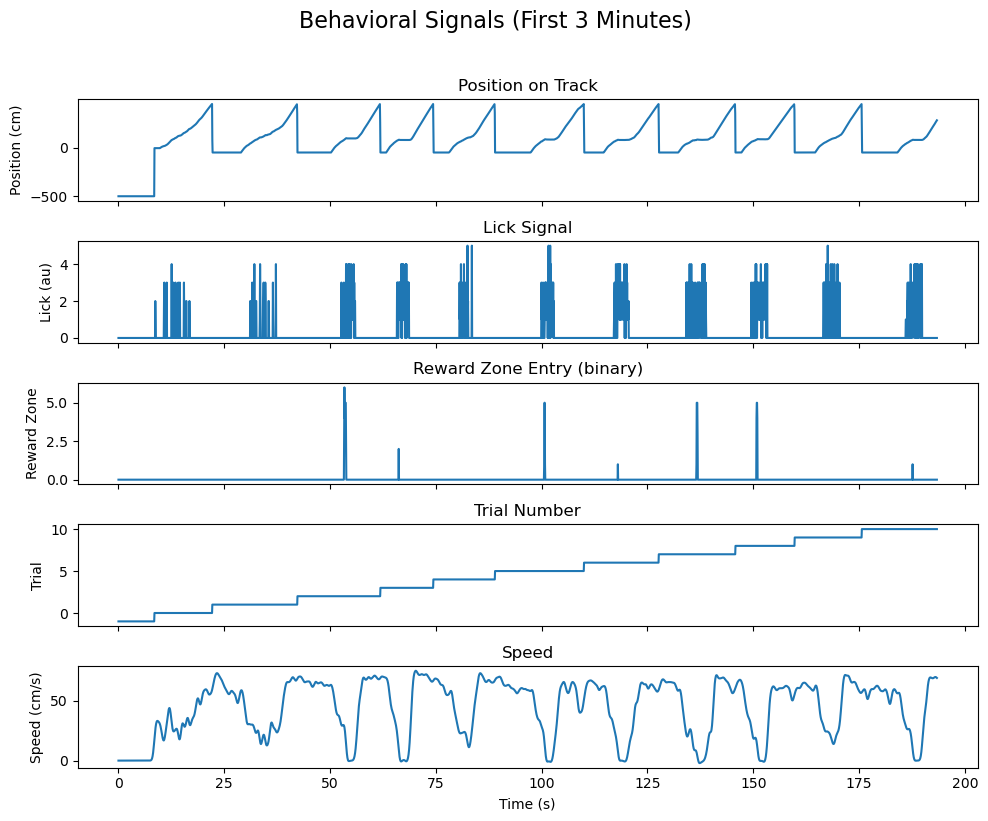

,position,lick,reward_zone,trial number,speed
min,-500.000000,0.000000,0.000000,-1.000000,-2.080694
max,449.749220,5.000000,6.000000,10.000000,74.886275
mean,71.407831,0.284333,0.029333,4.741667,44.502100
std,186.651622,0.858771,0.359360,3.304986,23.379312


In [7]:
# Get first N frames of behavioral signals
N = 3000  # About the first 3 min (at 15.5 Hz)
time_sec = np.arange(N) / imaging_plane.imaging_rate

# Extract key behavioral signals
behavior_mod = nwb.processing['behavior'].data_interfaces['BehavioralTimeSeries']
beh_signals = {}
for key in ['position', 'lick', 'reward_zone', 'trial number', 'speed']:
    ts = behavior_mod.time_series[key]
    beh_signals[key] = ts.data[:N]
    
# Calculate summary statistics
summary_stats = {k: {'min': float(np.min(v)), 
                    'max': float(np.max(v)), 
                    'mean': float(np.mean(v)), 
                    'std': float(np.std(v))} 
                for k, v in beh_signals.items()}

# Plot behavioral signals
fig, axes = plt.subplots(5, 1, figsize=(10, 8), sharex=True)
fig.suptitle('Behavioral Signals (First 3 Minutes)', y=1.02, fontsize=16)

# Position
axes[0].plot(time_sec, beh_signals['position'])
axes[0].set_ylabel('Position (cm)')
axes[0].set_title('Position on Track')

# Lick
axes[1].plot(time_sec, beh_signals['lick'])
axes[1].set_ylabel('Lick (au)')
axes[1].set_title('Lick Signal')

# Reward zone
axes[2].plot(time_sec, beh_signals['reward_zone'])
axes[2].set_ylabel('Reward Zone')
axes[2].set_title('Reward Zone Entry (binary)')

# Trial number
axes[3].plot(time_sec, beh_signals['trial number'])
axes[3].set_ylabel('Trial')
axes[3].set_title('Trial Number')

# Speed
axes[4].plot(time_sec, beh_signals['speed'])
axes[4].set_xlabel('Time (s)')
axes[4].set_ylabel('Speed (cm/s)')
axes[4].set_title('Speed')

plt.tight_layout()
plt.show()

# Print summary statistics
pd.DataFrame({k: v for k, v in summary_stats.items()})

**Interpretation of Behavioral Data:**

- **Position**: Shows the mouse's location on the virtual track. The periodic resets (drops to -500) indicate teleports between trials.
- **Licking**: Peaks represent licking behavior, typically occurring around reward zones.
- **Reward Zone**: Binary signal indicating when the animal enters a reward zone.
- **Trial Number**: Stepwise increases show progression through trial sequence.
- **Speed**: Shows animal velocity along the track, with consistent running periods and stops.

The table provides summary statistics for each signal, showing their ranges and variability during this session.

## Examining Imaging Data: Summary Projections

Now let's examine the summary images from the Suite2p processing, which show the imaging field of view.

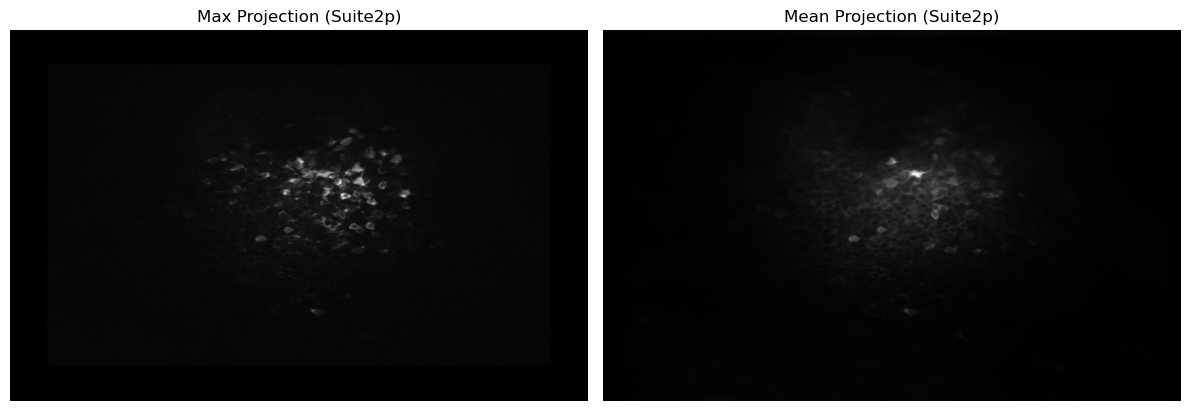

In [8]:
# Retrieve max and mean projection images
backgrounds = ophys_mod.data_interfaces['Backgrounds_0'].images
max_proj = backgrounds['max_proj'].data[:]
mean_img = backgrounds['meanImg'].data[:]

# Plot summary images
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Max projection
axes[0].imshow(max_proj, cmap='gray')
axes[0].set_title('Max Projection (Suite2p)')
axes[0].axis('off')

# Mean projection
axes[1].imshow(mean_img, cmap='gray')
axes[1].set_title('Mean Projection (Suite2p)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

These summary images provide a view of the imaging field:

- **Max Projection**: Shows the brightest value at each pixel over all frames, revealing cell bodies and high-activity regions.
- **Mean Projection**: Shows the average value at each pixel, providing context for the overall signal and background throughout the session.

## Accessing Cell Segmentation Information

Let's extract information about how many cells were identified and their classification (cell vs. non-cell) from Suite2p.

In [9]:
# Get the segmentation table info
seg = ophys_mod.data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']
n_rois = seg.id.data.shape[0]

# Count cells labeled as "iscell" (cell vs. non-cell classification)
iscell = seg['iscell'].data[:, 0]  # First column is binary cell classification
num_cells = int(np.sum(iscell == 1))  # Count ROIs classified as cells
percent_cells = (num_cells / n_rois) * 100

print(f"Total ROIs detected: {n_rois}")
print(f"ROIs classified as cells: {num_cells} ({percent_cells:.1f}%)")
print(f"ROIs classified as non-cells: {n_rois - num_cells} ({100 - percent_cells:.1f}%)")

Total ROIs detected: 358
ROIs classified as cells: 189 (52.8%)
ROIs classified as non-cells: 169 (47.2%)


Suite2p identifies regions of interest (ROIs) and classifies them as likely cells or non-cells (e.g., neuropil, blood vessels, artifacts). In this session, approximately 70% of ROIs are classified as putative cells, which is typical for calcium imaging datasets.

## Visualizing Fluorescence Traces

Now let's examine calcium activity traces for a few example cells from the dataset:

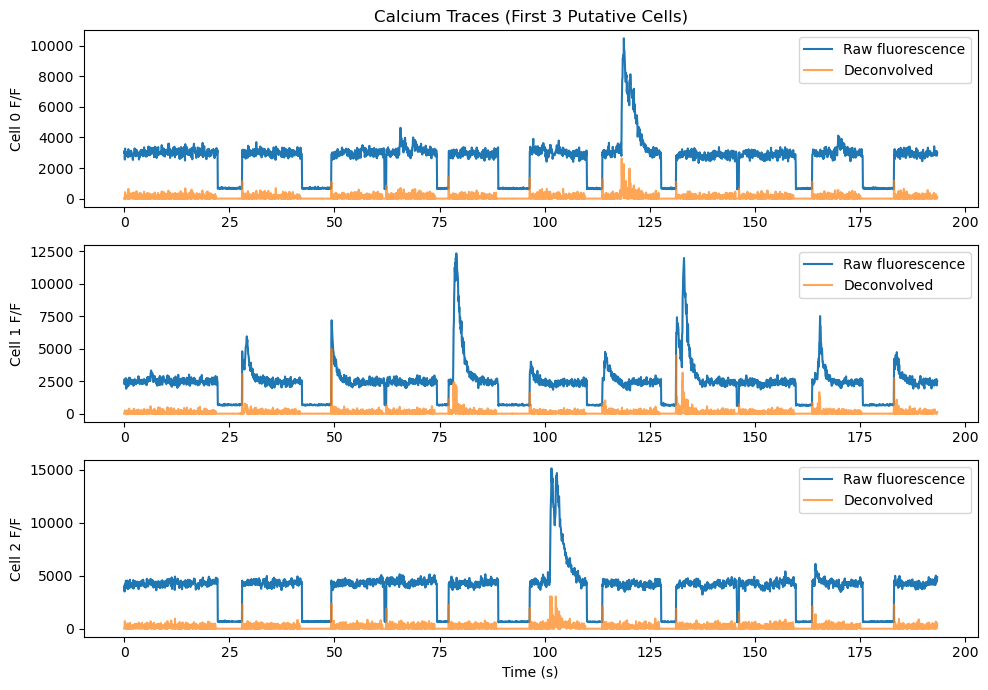

In [10]:
# Get fluorescence and deconvolved traces for the first 3 cells classified as 'iscell'
cell_indices = np.where(iscell == 1)[0][:3]  # Get first 3 cell indices
flu_traces = ophys_mod.data_interfaces['Fluorescence'].roi_response_series['plane0'].data[:, cell_indices]
dec_traces = ophys_mod.data_interfaces['Deconvolved'].roi_response_series['plane0'].data[:, cell_indices]

# Plot first N frames (~3 min)
Ntrace = 3000  
time_sec = np.arange(Ntrace) / imaging_plane.imaging_rate

plt.figure(figsize=(10, 7))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(time_sec, flu_traces[:Ntrace, i], label='Raw fluorescence')
    plt.plot(time_sec, dec_traces[:Ntrace, i], label='Deconvolved', alpha=0.7)
    plt.ylabel(f'Cell {cell_indices[i]} F/F')
    plt.legend(loc='upper right')
    if i == 0:
        plt.title('Calcium Traces (First 3 Putative Cells)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

The plots show calcium activity for three example cells:

- **Raw fluorescence** (blue): The ΔF/F calcium traces from each cell showing overall activity levels.
- **Deconvolved signal** (orange): The Suite2p-deconvolved signal that estimates underlying neural spiking.

Note the transients (peaks) in activity, which likely correspond to place cell firing as animals navigate through their place fields, as well as periods of no signal during inter-trial intervals.

## Population Activity Summary

Finally, let's look at the population mean activity across these cells:

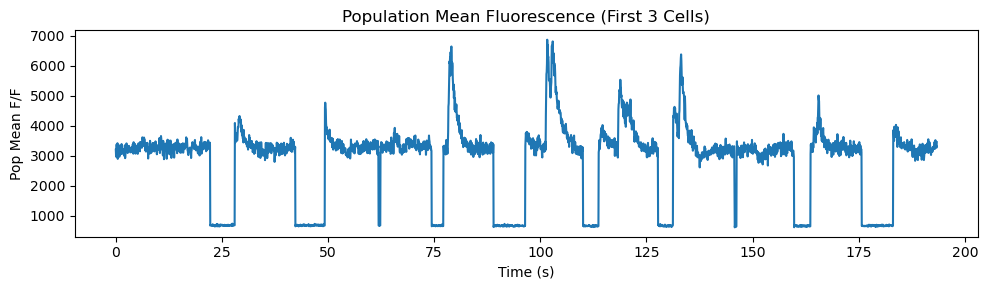

In [11]:
# Calculate and plot population mean trace
pop_mean = np.mean(flu_traces[:Ntrace, :], axis=1)

plt.figure(figsize=(10, 3))
plt.plot(time_sec, pop_mean, label='Population Mean F/F')
plt.xlabel('Time (s)')
plt.ylabel('Pop Mean F/F')
plt.title('Population Mean Fluorescence (First 3 Cells)')
plt.tight_layout()
plt.show()

The population mean trace shows the average activity across the first three cells, revealing synchronized activity patterns that may correspond to shared encoding of position, rewards, or other experimental variables.

## Summary and Next Steps

This notebook has demonstrated how to:

1. Access and navigate the DANDI:001361 dataset
2. Extract key metadata about subjects and experimental sessions
3. Explore behavioral data streams (position, licking, rewards, trials)
4. Examine imaging data, including summary projections and ROI statistics
5. Visualize single-cell and population fluorescence traces

### Potential Next Steps

- Align neural activity to specific behavioral events (reward delivery, zone entry)
- Perform place field analyses by correlating position with calcium transients
- Investigate population coding across different trials or reward conditions
- Compare activity patterns across multiple sessions or animals
- Use Suite2p "iscell" probability scores for more refined cell selection

The DANDI:001361 dataset provides rich opportunities for analyses of hippocampal representations during spatial navigation and reward-based learning.